<a href="https://colab.research.google.com/github/Nabeeha-Shafiq/22I-2336-ML-Assignment-1/blob/main/22i_2336_Z_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#getting / downloading the data from google drive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1ulOZ6iXVR2UGwAxbn_ylMHu9FxlAZ6Jx'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('flight_data.csv')

# now we will put all .csv data into a dataframe , using pandas library for it

import pandas as pd
df = pd.read_csv('flight_data.csv')
#df.info sey we will get an idea about rows and cols and datatypes
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000249 entries, 0 to 1000248
Data columns (total 18 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   from_airport_code                998866 non-null   object 
 1   from_country                     998866 non-null   object 
 2   dest_airport_code                998866 non-null   object 
 3   dest_country                     998866 non-null   object 
 4   aircraft_type                    984952 non-null   object 
 5   airline_number                   998866 non-null   object 
 6   airline_name                     1000249 non-null  object 
 7   flight_number                    1000249 non-null  object 
 8   departure_time                   1000249 non-null  object 
 9   arrival_time                     1000249 non-null  object 
 10  duration                         1000249 non-null  int64  
 11  stops                            1000249 non-null 

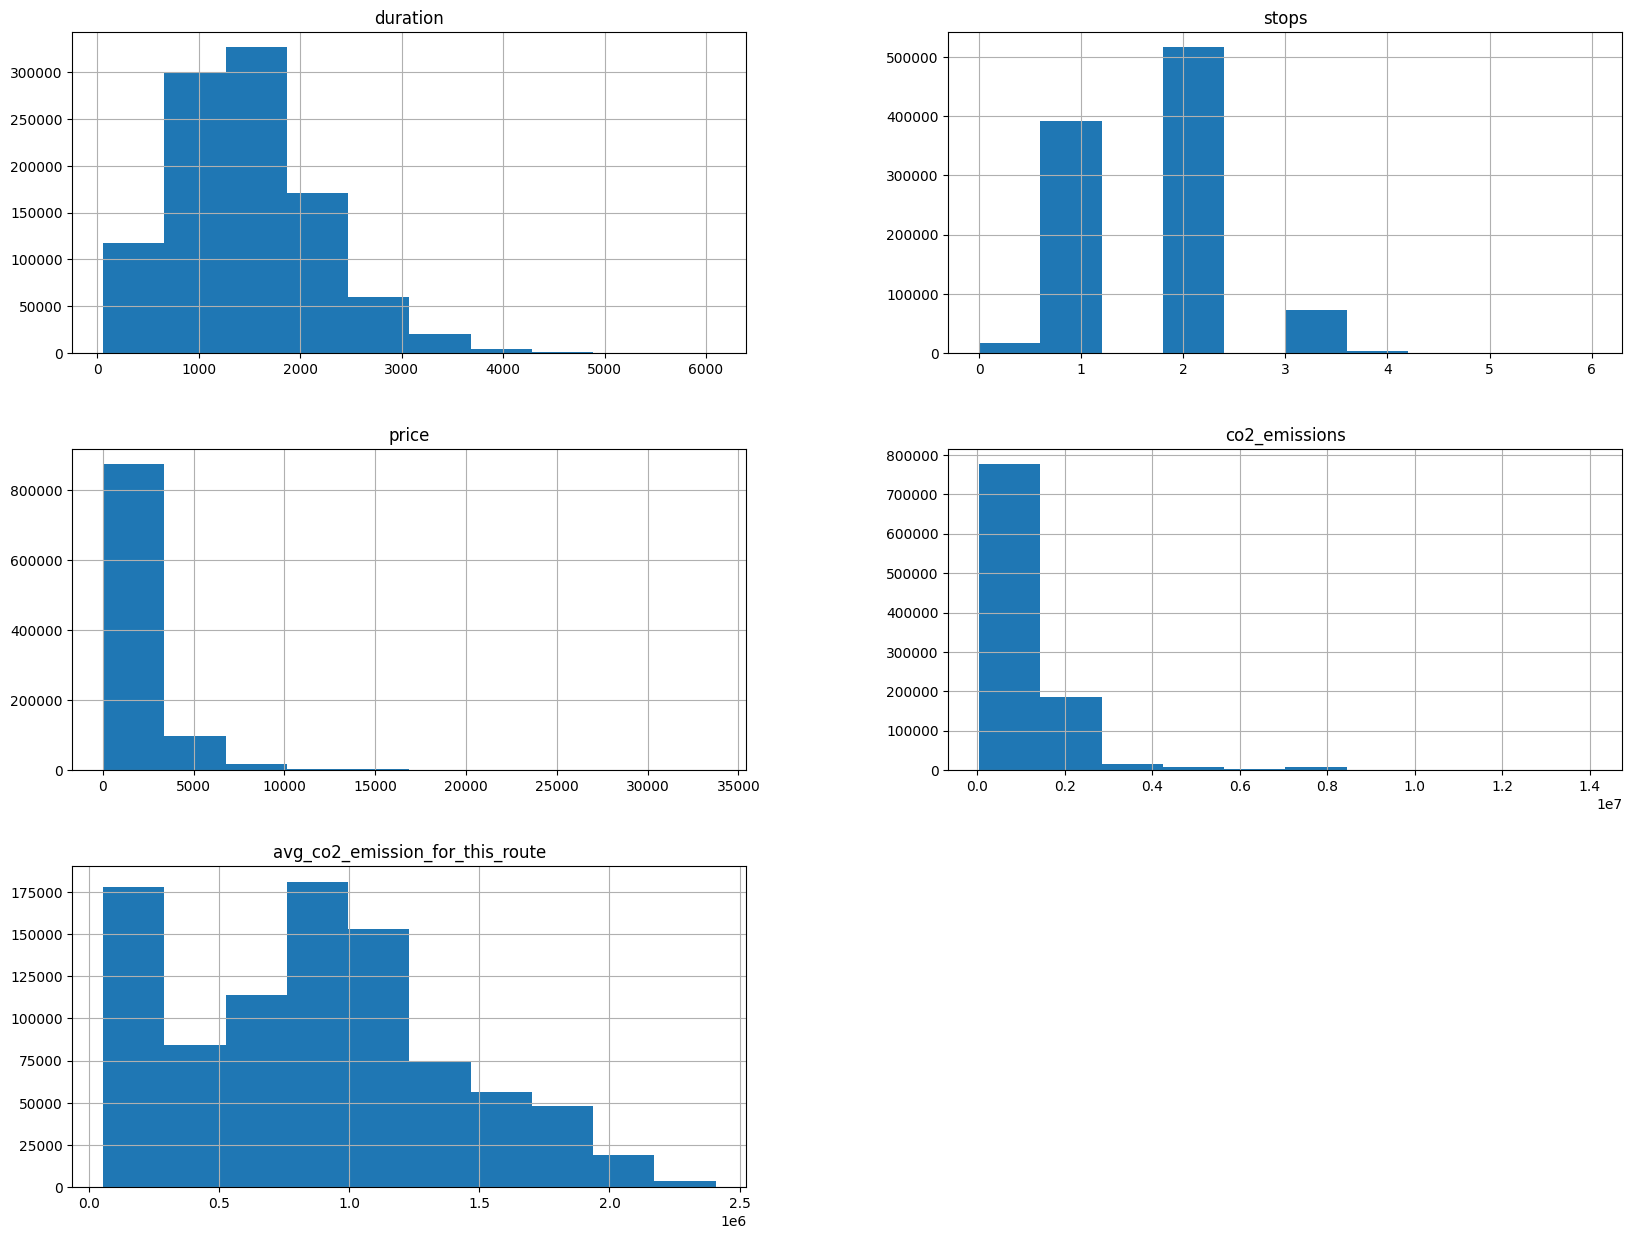

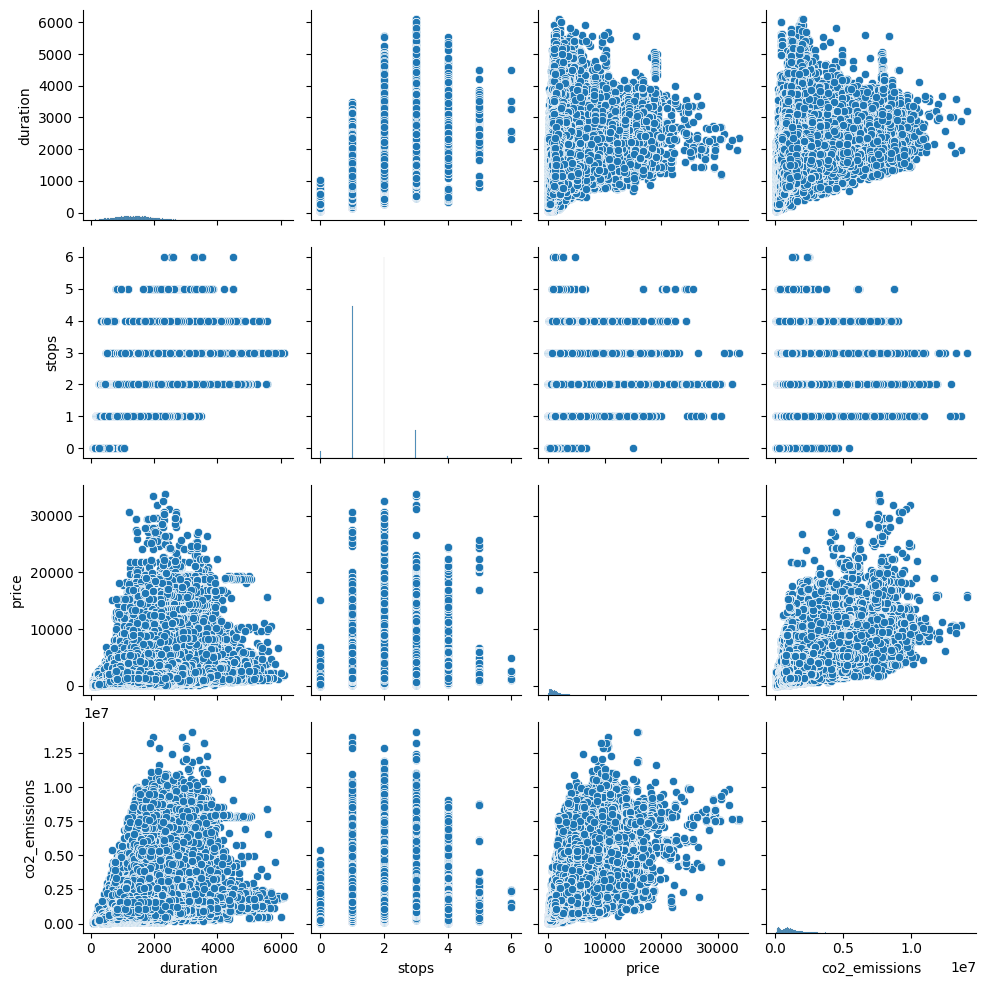

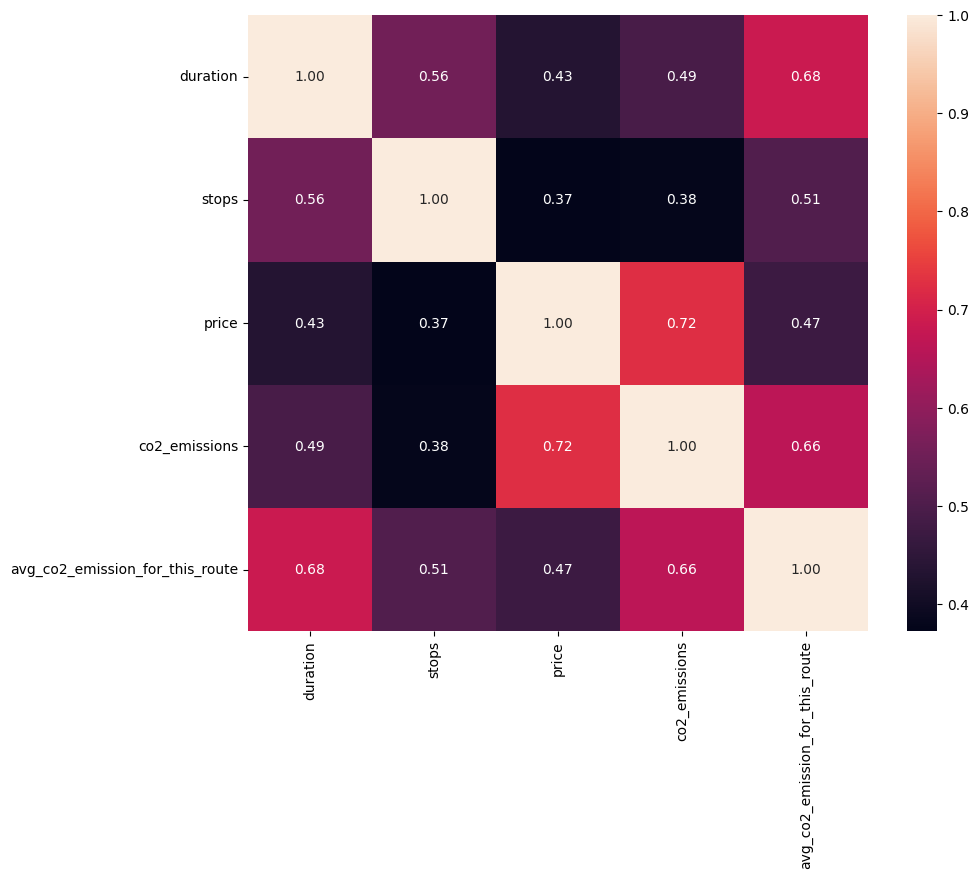

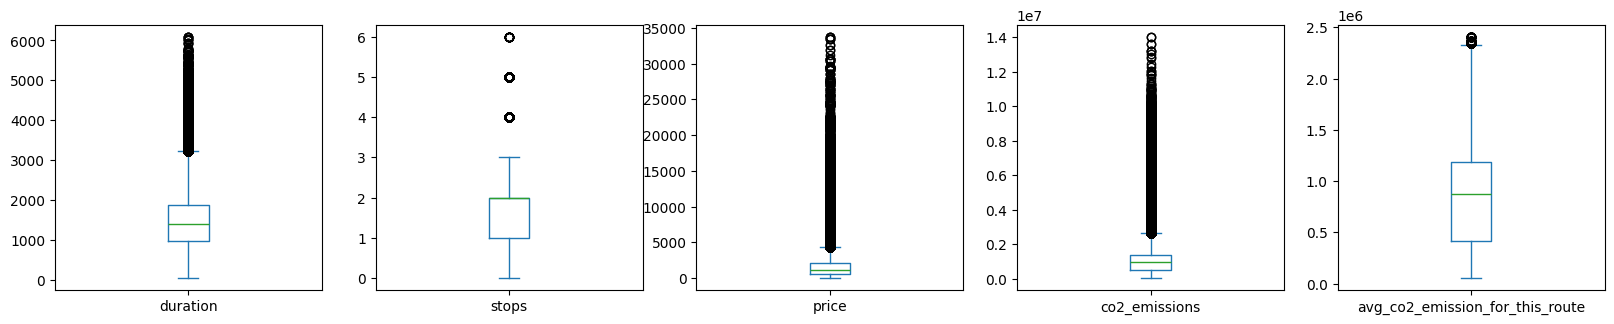

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
#show histograms for numerical / int/float datatype , bar charts are best for numerical data analysis
df.hist(figsize=(20, 15))
plt.show()

# Scatter plots for the first few numeric features, change as per dataset
sns.pairplot(df.select_dtypes(include=['float64', 'int64']).iloc[:, :4])
plt.show()

#correlation matrix should be only for numeric data types
#ya to include only numeric datatypes
#or do one hot/ any encoding for object(categorical) features
numeric_df=df.select_dtypes(include=['float64', 'int64'])
# Calculate the correlation matrix
corr_matrix = numeric_df.corr()
#colour the corr matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

# boxplots
df.plot(kind='box', subplots=True, layout=(5,5), figsize=(20, 20), sharex=False)
plt.show()


By analysing from the different EDA visualisations , correlation matrix helped the most in decinding which features are more important and how features are related to each other , I have also decided by analysing my correlation matrix that I am going to predict ( regression ) values for


*   Flight Duration
*   Price
*   C02 Emission

I can conclude these relations from the correlation matrix

1.   stops and co2 emission have moderate linear relation with flight duration and it makes sense too that more stops equal more fuel consumption and more duration

2.   more fuel consumpiton equals more price and more co2 emission too and more duration too and vice versa

3. price and co2 emission have a direct high correaltion , makes sense too because price increases by more fuel consumption   
   









**Analysing Box Plots**
Duration has a lot of outliers indicating many flights may have unusually long durations due to several reasons
Stops have most values in the box plots; only a few 3 values were high .
Price and Co2 emission are well concentrated in their box plots hence being normal


In [4]:
#this gives us 0 both times cz whne i ran code already 1st time df was modified :)
missing_values = df.isnull().sum()
print("Missing values per column before handling null values :\n", missing_values)


for column in df.columns:
    #kahin koi null value to nahi hey
    if df[column].isnull().any():
        if df[column].dtype == 'float64' or df[column].dtype == 'int64':
            #float and int (numerical) datatype ko eman / median / mode kisi sey bhi replave kar saktey i choose mean
            df[column].fillna(df[column].median(), inplace=True)
        elif df[column].dtype == 'object':
            #for string (object ) datatype fill null NAN with most frquent value in column , simpil
            most_frequent = df[column].mode()[0]
            df[column].fillna(most_frequent, inplace=True)

after_values = df.isnull().sum()
print("Missing values per column after handling null values :\n", after_values)


Missing values per column before handling null values :
 from_airport_code                   1383
from_country                        1383
dest_airport_code                   1383
dest_country                        1383
aircraft_type                      15297
airline_number                      1383
airline_name                           0
flight_number                          0
departure_time                         0
arrival_time                           0
duration                               0
stops                                  0
price                               1353
currency                               0
co2_emissions                       4874
avg_co2_emission_for_this_route    88402
co2_percentage                     88402
scan_date                              0
dtype: int64


<ipython-input-4-d2474b84bfe3>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(most_frequent, inplace=True)
<ipython-input-4-d2474b84bfe3>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Missing values per column after handling null values :
 from_airport_code                  0
from_country                       0
dest_airport_code                  0
dest_country                       0
aircraft_type                      0
airline_number                     0
airline_name                       0
flight_number                      0
departure_time                     0
arrival_time                       0
duration                           0
stops                              0
price                              0
currency                           0
co2_emissions                      0
avg_co2_emission_for_this_route    0
co2_percentage                     0
scan_date                          0
dtype: int64


In [12]:
#task 2
import pandas as pd

numeric_cols = df.select_dtypes(include=[np.number])

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

outliers = numeric_cols[(numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))].any(axis=1)

print(f'Number of outliers detected: {outliers.sum()}')


Number of outliers detected: 98327


In [13]:
df.head()


,from_airport_code,from_country,dest_airport_code,dest_country,aircraft_type,airline_number,airline_name,departure_time,arrival_time,duration,stops,price,currency,co2_emissions,avg_co2_emission_for_this_route,co2_percentage,day_of_week,month
0,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Airbus A330|Airbu...,multi,[Air France| Iberia| LATAM],2022-04-30 14:30:00,5/1/2022 10:15,1425,3,1279.0,USD,1320000.0,1320000.0,0%,Saturday,4
1,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Boeing 787|Airbus...,multi,[Air France| Iberia| LATAM],2022-04-30 14:30:00,5/1/2022 10:15,1425,3,1279.0,USD,1195000.0,1320000.0,-9%,Saturday,4
2,ALG,Algeria,AEP,Argentina,Airbus A320|Airbus A321|Boeing 787|Airbus A320,multi,[Air France| LATAM],2022-04-30 12:45:00,5/1/2022 10:15,1530,3,1284.0,USD,1248000.0,1320000.0,-5%,Saturday,4
3,ALG,Algeria,AEP,Argentina,Airbus A318|Airbus A320|Boeing 787|Airbus A320,multi,[Air France| LATAM],2022-04-30 14:30:00,5/1/2022 10:15,1425,3,1290.0,USD,1347000.0,1320000.0,2%,Saturday,4
4,ALG,Algeria,AEP,Argentina,Airbus A321neo|Boeing 777|Airbus A320,multi,[Lufthansa| LATAM],2022-04-30 12:35:00,5/1/2022 10:15,1540,2,1347.0,USD,1381000.0,1320000.0,4%,Saturday,4


In [5]:
#TASK NO 3 , creting a new useful column
#I can see that in general flight costs , the fight costs escalate in seasons/days of week so what if i extract day of week from departure date and time given
#this day of week feature could have relation to prices
df['departure_time']=pd.to_datetime(df['departure_time'])
df['day_of_week'] = df['departure_time'].dt.day_name()
df['month'] = df['departure_time'].dt.month
#i am dropping these 2 columns that i think are not really useful in our predictions
#scan date is the date all these records were collected and hence ig same value for all rows and flight number is just a number  , no real relation to anything
df = df.drop(columns=['flight_number', 'scan_date'])



In [14]:
df.head()

,from_airport_code,from_country,dest_airport_code,dest_country,aircraft_type,airline_number,airline_name,departure_time,arrival_time,duration,stops,price,currency,co2_emissions,avg_co2_emission_for_this_route,co2_percentage,day_of_week,month
0,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Airbus A330|Airbu...,multi,[Air France| Iberia| LATAM],2022-04-30 14:30:00,5/1/2022 10:15,1425,3,1279.0,USD,1320000.0,1320000.0,0%,Saturday,4
1,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Boeing 787|Airbus...,multi,[Air France| Iberia| LATAM],2022-04-30 14:30:00,5/1/2022 10:15,1425,3,1279.0,USD,1195000.0,1320000.0,-9%,Saturday,4
2,ALG,Algeria,AEP,Argentina,Airbus A320|Airbus A321|Boeing 787|Airbus A320,multi,[Air France| LATAM],2022-04-30 12:45:00,5/1/2022 10:15,1530,3,1284.0,USD,1248000.0,1320000.0,-5%,Saturday,4
3,ALG,Algeria,AEP,Argentina,Airbus A318|Airbus A320|Boeing 787|Airbus A320,multi,[Air France| LATAM],2022-04-30 14:30:00,5/1/2022 10:15,1425,3,1290.0,USD,1347000.0,1320000.0,2%,Saturday,4
4,ALG,Algeria,AEP,Argentina,Airbus A321neo|Boeing 777|Airbus A320,multi,[Lufthansa| LATAM],2022-04-30 12:35:00,5/1/2022 10:15,1540,2,1347.0,USD,1381000.0,1320000.0,4%,Saturday,4


In [15]:
#ONTO TASK 3
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
#after analyzing data I have decided i will one hot encode my column airline number
#I decided upon one hot encoding for this column because this column had less unique types and were the labels had no numercial/order wise relation between them
categorical_cols = ['airline_number']
#these most useful numercial columns after EDA , i will scale them via Standard Scaling
#In Standard Scaling as we studied in Stats course Z mean of data is 0 and it has a standard deviation of 1 means all the values in thousands etc are scaled bw [-1 and 1 ] with their mean being 0
#this scaling introduces simplicity and computational ease to calculations
numerical_cols = ['price', 'duration', 'co2_emissions','stops']
#for a pipeline as in Scikit pipeline you gotta first like prepare the model before you apply actual transformation onto it
#its like building up the skeleton before
# Onehot encode categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
#standard scaler for numercal columns transformaer
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'  # here i could write drop which would literally drop al other columns except for ones we are pre processing
    #so i wrote  passthrough bcz i do not want all my other features to be dropped at all
)

from sklearn.linear_model import LinearRegression
# pipeline = preprocessor + regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
X = df.drop('price', axis=1)
y = df['price']



In [16]:
#df.head()
#when i did df.head() the columns were not one hot encoded and neither were numerical ones scaled
#it is we did processing in pipeline and not on df
#we setup the transformations and all , and they are relative to model to df
print(df.columns)

Index(['from_airport_code', 'from_country', 'dest_airport_code',
       'dest_country', 'aircraft_type', 'airline_number', 'airline_name',
       'departure_time', 'arrival_time', 'duration', 'stops', 'price',
       'currency', 'co2_emissions', 'avg_co2_emission_for_this_route',
       'co2_percentage', 'day_of_week', 'month'],
      dtype='object')


In [7]:
#onto task 4
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import cross_val_score
#X is all the features except for the one u are going to predict
X = df.drop('price', axis=1)
# y is the oneur gonna preditc
y = df['price']
#data preprocessing to set up timeline
#detailed comments about pre processing in upper code snippet
categorical_cols = ['airline_number']
numerical_cols = ['duration', 'co2_emissions', 'stops']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='drop'
)
pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

#test size =20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# actual training happens here
pipeline2.fit(X_train, y_train)
#evaluating part of model
y_pred = pipeline2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  #manually take square root , errros without this using built in function
r2 = r2_score(y_test, y_pred)

# K fold Cross Validation Using in my models
scores = cross_val_score(pipeline2, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print("Cross-validated RMSE scores:", rmse_scores)
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")
#Task 5 starts from here
from sklearn.model_selection import GridSearchCV
param_grid = {
    'preprocessor__num__scaler__with_mean': [True, False],  # Whether to center the data before scaling
    'preprocessor__num__scaler__with_std': [True, False]   # Whether to scale data to unit variance
}
grid_search = GridSearchCV(pipeline2, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)
#alaways print the best parameters found for your learning
print("Best parameters:", grid_search.best_params_)
#best model keep close to your dil
best_model = grid_search.best_estimator_
#predict on test test you isolated via best model dil waala
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Best model RMSE on Test Set:", rmse)
print("Best model R2 Score on Test Set:", r2)


Cross-validated RMSE scores: [1709.69674902 1348.37711209 1648.61753548 1018.77533403  990.5061809 ]
RMSE: 1334.537251893992
R2 Score: 0.547795045697502
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'preprocessor__num__scaler__with_mean': False, 'preprocessor__num__scaler__with_std': True}
Best model RMSE on Test Set: 1334.537030830731
Best model R2 Score on Test Set: 0.5477951955110699


For linear regeression there really are not any hyper parameters that you could tune / change except for like learning rate , what we could do here in linear regression model fine tuning is that we fine tune the preprocessing steos , now like we did one hot encoding for categorical features and we also did standard scaling for numemrical features and we know there are multiple ways to do scaling , wether centarlising values to a mean or not and hence many varaitions or even type of scaling like standard scaling or MinMax Scaling , hence we could train different models using these diff rpreprocessing variation and comapre them to see the one that performs the best and keep that one for our use :)

Results Of Hyper Parameter Tuning indicate that when preprocessing numerical values via Standard Scaler if we scale values to a mean of 0 and a standard deviation of 1 would indeed improve performance more than scaling  

Root Mean Squared Error , sum of y-y^ , and then take mean and then take root
RMSE score basically tells us how much error is between actual and predicted values , the smaller it is the better ,it is a mathematical measure and like tells how close to the best fit line you are .

R2 score is a measure of variance in your predicted and actual values, high variance == 1 means high correlation bw 2 values , while low means there is little to no relation between values
My R2 score indicates moderately well performing linear regression model


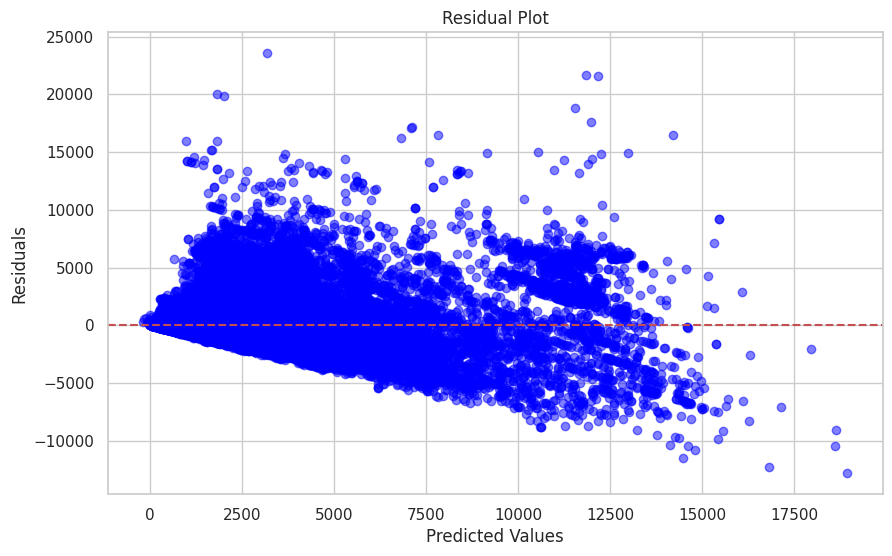

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


**Analysis** :
 In a residual plot we keep on x- axis the predicted values and on y axis the diff bw predicated and actual values
My analysis of this Residual plot is that at higher values my predictions are too randomised hence ig not better but at small values the concentrated points indicate better evaluations.
There is non linearity in the predictions too.

Since linear regression is a simple basic model , maybe for our data it is not the best model
LEts try out other complex and better ML models to see which one would yield us the best results.
Or we could also try out better and more data preprocessing

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
nn_model = MLPRegressor(
    hidden_layer_sizes=(10,),
    activation='relu',
    solver='adam',
    max_iter=100,
    random_state=42,
    learning_rate_init=0.01,
    tol=1e-3
)
pipelineNN = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', nn_model)
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
pipelineNN.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error, r2_score
y_pred = pipelineNN.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
#this is one time validation
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipelineNN, X, y, cv=5, scoring='neg_mean_squared_error')
cross_val_rmse = np.sqrt(-scores)
print("Cross-validated RMSE scores:", cross_val_rmse)
print("Mean RMSE across folds:", cross_val_rmse.mean())

#task 5
param_distributions = {
    'regressor__hidden_layer_sizes': [(10,), (20,)],
    'regressor__learning_rate_init': [0.001, 0.01],
    'regressor__max_iter': [100, 200]
}

random_search = RandomizedSearchCV(
    pipelineNN,
    param_distributions=param_distributions,
    n_iter=5,
    cv=2,
    scoring='neg_mean_squared_error',
    random_state=42,
    verbose=1
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
random_search.fit(X_train, y_train)
best_nn_model = random_search.best_estimator_
y_pred = best_nn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {random_search.best_params_}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


RMSE: 1312.2120406978054
R2 Score: 0.5627981903199085


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validated RMSE scores: [1679.41865205 1400.58019277 1665.94565422  999.56397822  988.65824882]
Mean RMSE across folds: 1346.8333452144684
Fitting 2 folds for each of 5 candidates, totalling 10 fits


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Parameters: {'regressor__max_iter': 200, 'regressor__learning_rate_init': 0.01, 'regressor__hidden_layer_sizes': (20,)}
RMSE: 1302.4019100438034
R2 Score: 0.5693108184322222


Decision Tree I have used here beacuse it is a comparitively better and efficient ML algorithm , decision tree works by breakinf down the classification/prediction form root node , so kind of like the model start from root node , it looks at the features like what was the duration of flight , what was the co2 emission of flight , how many stopy were there in flight each of these decisions is a level of tree and the final decision is taken based off of decision at each step/level of tree .

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
import numpy as np
# This assumes 'price' is the correct column name and it exists in your DataFrame
y = df['price']  # Isolate the target column
X = df.drop('price', axis=1)  # Drop the target to isolate features

tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Data preparation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Model training and cross-validation
tree_pipeline.fit(X_train, y_train)
y_pred = tree_pipeline.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)  # Always works, calculates MSE
rmse = mse ** 0.5  # Manually calculate RMSE

r2 = r2_score(y_test, y_pred)  # Calculate R2 Score

print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

scores = cross_val_score(tree_pipeline, X, y, cv=2, scoring='neg_mean_squared_error')

# Calculate RMSE from the scores
rmse_scores = np.sqrt(-scores)

# Output the results
print("Cross-validated RMSE scores:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))
print("Standard Deviation of RMSE:", np.std(rmse_scores))

param_distributions = {
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 10, 20],
    'regressor__min_samples_leaf': [1, 5, 10]
}
random_search = RandomizedSearchCV(
    estimator=tree_pipeline,
    param_distributions=param_distributions,
    n_iter=10,  # Number of parameter settings sampled
    cv=2,  # 2-fold cross-validation
    scoring='neg_mean_squared_error',
    random_state=42,
    verbose=1
)
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Conduct the randomized search
random_search.fit(X_train, y_train)

# Best model from the search
best_tree_model = random_search.best_estimator_

# Predictions
y_pred = best_tree_model.predict(X_test)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", random_search.best_params_)
print(f"Test RMSE: {rmse}")
print(f"Test R2 Score: {r2}")


Parameters of a ML modle are internal to a model and may change at every epochs like
-weights
-biases
-coefficients

Hyper parameters are the parameters external to a ML model and remain same for all model , like learning rate , k value in KNN , etc

**PLEASE NOTE THAT FOR DECISION TREE MODEL , SINCE GOOGLE COLAB WAS TAKING TOO MUCH EXECUTION TIME THEREFORE I RAN IT LOCALLY ON MY LAPTOP VS CODE AND HERE ARE ATTACHED SCREENSHOT RESULTS , THESE SS COULD ACT LIKE OUTPUT OF ABOVE CODE
Thank you :) ***

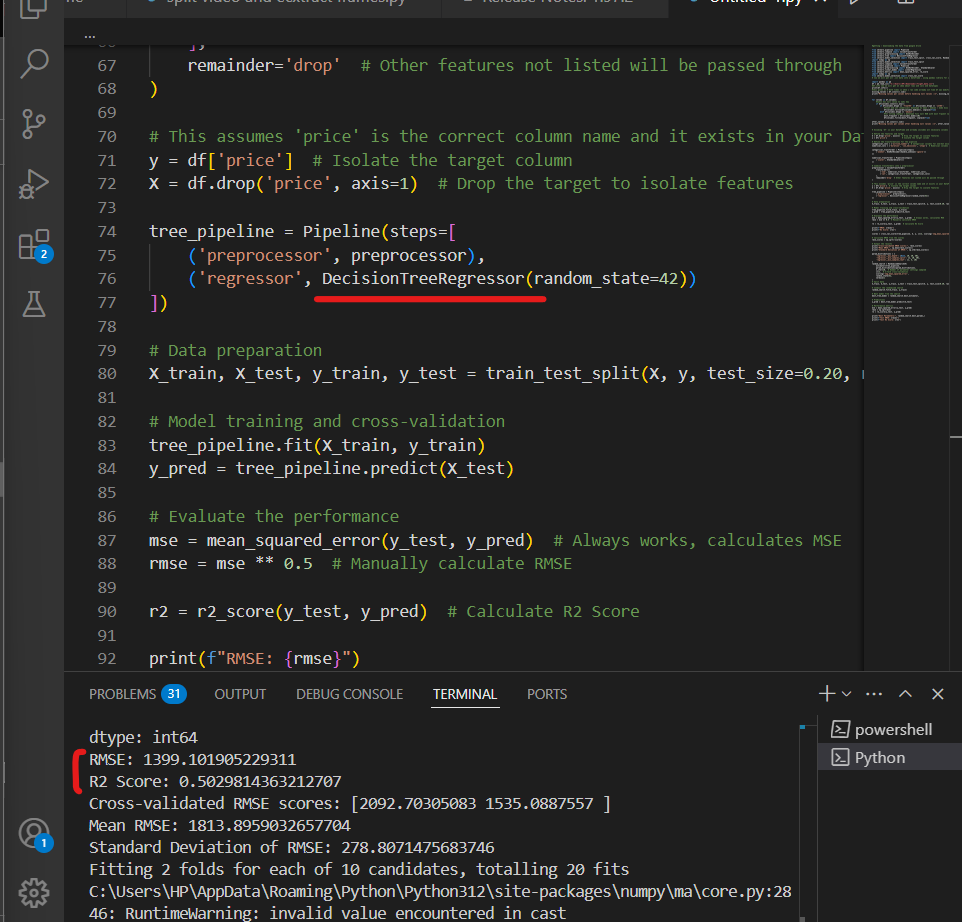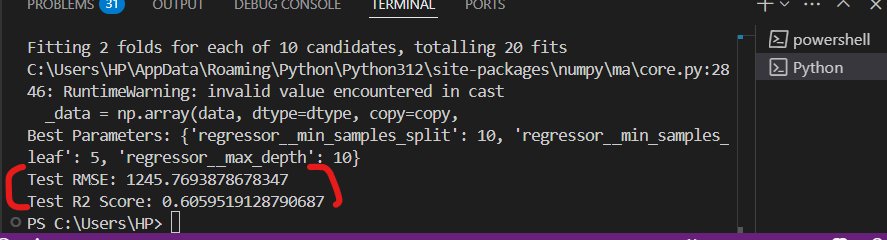

In [10]:
#TASK 9 AND TASK 10
#load df code markdown run before this
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
X = df.drop('price', axis=1)
y = df['price']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['duration', 'co2_emissions', 'stops']),
        ('cat', categorical_transformer, ['airline_number', 'day_of_week', 'month']) #testing if the features i added new features help / not
    ],
    remainder='drop'
)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
#no folds given so its obv holdout rmse
print("Holdout RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Holdout R2 Score:", r2_score(y_test, y_pred))

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_rmse_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='neg_mean_squared_error')
print("K-Fold RMSE:", np.sqrt(-kf_rmse_scores.mean()))




Holdout RMSE: 1329.7048974663383
Holdout R2 Score: 0.5510639814773614
K-Fold RMSE: 1327.2101052828061


In [28]:
#TASK 9
#STRATISFIED SAMPLING
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
X = df.drop('price', axis=1)
y = df['price']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['duration', 'co2_emissions', 'stops']),
        ('cat', categorical_transformer, ['airline_number', 'day_of_week', 'month']) #testing if the features i added new features help / not
    ],
    remainder='drop'
)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
#divide y into 10 classes using qcut
df['price_category'] = pd.qcut(df['price'], q=10, labels=False)
#make sure to use these categorires in your slpit
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=df['price_category'], random_state=42
)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print ("Stratisfied Sampling ")
print("Holdout RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Holdout R2 Score:", r2_score(y_test, y_pred))

Stratisfied Sampling 
Holdout RMSE: 1324.897051470922
Holdout R2 Score: 0.5512618513254448


Stratisfied Sampling makes sure that your target variable,s all classes like for eb both genders are equally represented in the dataset split .
Since the prices column and my data did not have like such distint classes I randomly split it into 10 classes so that any outlier / class is equally represented in data split.

In [ ]:
# (LOOCV)
loocv = LeaveOneOut()
loocv_rmse_scores = cross_val_score(pipeline, X, y, cv=loocv, scoring='neg_mean_squared_error')
print("LOOCV RMSE:", np.sqrt(-loocv_rmse_scores.mean()))

LOOCV never executed entirely because it trains on n-1 folds (training on n-1 samples and testing on 1 sample and then keep on looping) hence 1 million folds hence computationally insufficient on my laptop